In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
import iris.quickplot as qplt
from iris.coords import DimCoord
from iris.cube import Cube
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point


import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import warnings
warnings.filterwarnings("ignore")

# LIG AMOC mean (annual) 

models: ACCESS-ESM1-5, CESM2, EC-Earth3-LR, FGOALS-f3-L, 
        FGOALS-g3, GISS-E2-1-G, HadGEM-CG31-LL, IPSL-CM6A-LR, 
        NorESM2-LM



### load the lig_HadGEM-CG31-LL AMOC data

In [4]:
filename_40='../../../Desktop/esgf_data_folder/streamfunction/lig_hadgem_combined.nc'
hadgem_1=xr.open_dataset(filename_40,decode_times=False)
#print(hadgem_1)

In [5]:
hadgem_2=hadgem_1.sel(basin=0)
print(hadgem_2)

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 75, rlat: 330, time: 1200)
Coordinates:
  * time       (time) float64 3.602e+04 3.604e+04 ... 7.196e+04 7.198e+04
    sector     |S21 ...
  * lev        (lev) float64 0.0 1.024 2.103 ... 5.393e+03 5.596e+03 5.8e+03
  * rlat       (rlat) float64 -85.35 -85.19 -85.04 -84.89 ... 81.73 81.77 81.79
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lev_bnds   (lev, bnds) float64 ...
    rlat_bnds  (rlat, bnds) float64 ...
    msftyz     (time, lev, rlat) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  267840.0
    cv_version:             6.2.20.1
    data_specs_version:     01.00.29
    forcing_index:          1
    frequency:              mon
    grid:                   Native eORCA1 tripolar primarily 1 deg with merid...
    grid_label:             g

In [6]:
hadgem=hadgem_2.mean(dim='time')
print(hadgem)

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 75, rlat: 330)
Coordinates:
    sector     |S21 ...
  * lev        (lev) float64 0.0 1.024 2.103 ... 5.393e+03 5.596e+03 5.8e+03
  * rlat       (rlat) float64 -85.35 -85.19 -85.04 -84.89 ... 81.73 81.77 81.79
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (bnds) float64 5.398e+04 5.402e+04
    lev_bnds   (lev, bnds) float64 -0.4942 0.5058 0.5058 ... 5.698e+03 5.902e+03
    rlat_bnds  (rlat, bnds) float64 -85.42 -85.27 -85.27 ... 81.78 81.78 81.8
    msftyz     (lev, rlat) float32 nan nan nan nan nan ... nan nan nan nan nan


In [7]:
hadgem_amoc_data=hadgem.msftyz.values
hadgem_lev_data=hadgem.lev.values
hadgem_lat_data=hadgem.rlat.values

In [8]:
depth = DimCoord(hadgem_lev_data, standard_name='depth', units='m')
latitude = DimCoord(hadgem_lat_data, standard_name='latitude', units='degrees')

cube_hadgem_amoc = Cube(hadgem_amoc_data,dim_coords_and_dims=[(depth, 0), (latitude, 1)])

In [9]:
cube_hadgem_amoc.data *=1e-9
cube_hadgem_amoc.units = 'Sv'
print(cube_hadgem_amoc)

unknown / (Sv)                      (depth: 75; latitude: 330)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


## load the lig_FGOALS-g3 AMOC data

In [10]:
filename_30='../../../Desktop/esgf_data_folder/streamfunction/lig_fgoalsg3_combined.nc'
fgoalsg3_1=xr.open_dataset(filename_30,decode_times=False)

In [11]:
fgoalsg3_2=fgoalsg3_1.sel(basin=0)
print(fgoalsg3_2)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 316, lev: 31, time: 6000)
Coordinates:
    sector     |S21 ...
  * lev        (lev) float64 0.0 10.0 20.0 30.0 ... 4.19e+03 4.887e+03 5.6e+03
  * lat        (lat) float64 -75.99 -75.75 -75.5 -75.24 ... 89.37 89.62 89.87
  * time       (time) int64 0 708 1416 2148 ... 4377060 4377792 4378524 4379256
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lev_bnds   (time, lev, bnds) float64 ...
    lat_bnds   (time, lat, bnds) float64 ...
    msftmz     (time, lev, lat) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            PMIP
    branch_method:          no parent
    branch_time_in_child:   273385.0
    branch_time_in_parent:  0.0
    contact:                Lijuan Li(ljli@mail.iap.ac.cn)
    creation_date:          2019-10-25T03:43:32Z
    data_specs_version:     01.00.30
    experiment:             last interglacial (127k)
    experiment_id:          lig1

In [13]:
fgoalsg3=fgoalsg3_2.mean(dim='time')
print(fgoalsg3)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 316, lev: 31)
Coordinates:
    sector     |S21 ...
  * lev        (lev) float64 0.0 10.0 20.0 30.0 ... 4.19e+03 4.887e+03 5.6e+03
  * lat        (lat) float64 -75.99 -75.75 -75.5 -75.24 ... 89.37 89.62 89.87
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (bnds) float64 3.646e+05 3.646e+05
    lev_bnds   (lev, bnds) float64 0.0 5.0 5.0 ... 5.244e+03 5.244e+03 5.6e+03
    lat_bnds   (lat, bnds) float64 -89.95 -75.87 -75.87 ... 89.75 89.75 89.95
    msftmz     (lev, lat) float32 nan 0.0 0.0 0.0 0.0 ... nan nan nan nan nan


In [14]:
fgoalsg3_amoc_data=fgoalsg3.msftmz.values
fgoalsg3_lev_data=fgoalsg3.lev.values
fgoalsg3_lat_data=fgoalsg3.lat.values

In [15]:
depth = DimCoord(fgoalsg3_lev_data, standard_name='depth', units='m')
latitude = DimCoord(fgoalsg3_lat_data, standard_name='latitude', units='degrees')

cube_fgoalsg3_amoc = Cube(fgoalsg3_amoc_data,dim_coords_and_dims=[(depth, 0), (latitude, 1)])

In [16]:
cube_fgoalsg3_amoc.data *=1e-9
cube_fgoalsg3_amoc.units = 'Sv'
print(cube_fgoalsg3_amoc)

unknown / (Sv)                      (depth: 31; latitude: 316)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


## load the lig_EC-Earth3-LR AMOC data

In [17]:
filename_31='../../../Desktop/esgf_data_folder/streamfunction/lig_ec_earth_combined.nc'
ec_1=xr.open_dataset(filename_31,decode_times=False)

In [18]:
ec_2=ec_1.sel(basin=1)
print(ec_2)

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 75, rlat: 292, time: 2520)
Coordinates:
    sector     |S21 ...
  * rlat       (rlat) float64 -78.01 -77.82 -77.62 -77.42 ... 89.15 89.37 89.59
  * lev        (lev) float64 0.0 1.024 2.103 ... 5.393e+03 5.596e+03 5.8e+03
  * time       (time) float64 1.425e+05 1.425e+05 ... 2.191e+05 2.191e+05
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lev_bnds   (time, lev, bnds) float64 ...
    rlat_bnds  (time, rlat, bnds) float64 ...
    msftyz     (time, lev, rlat) float32 ...
Attributes:
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        PMIP
    branch_method:                      standard
    branch_time_in_child:               0.0
    branch_time_in_parent:              0.0
    branch_time:                        0.0
    contact:                            cmip6-data@ec-earth.org
    creation_date:                      2019-12-24T23:24:54Z
    data_s

In [19]:
ec=ec_2.mean(dim='time')

In [20]:
ec_amoc_data=ec.msftyz.values
ec_lev_data=ec.lev.values
ec_lat_data=ec.rlat.values

In [21]:
depth = DimCoord(ec_lev_data, standard_name='depth', units='m')
latitude = DimCoord(ec_lat_data, standard_name='latitude', units='degrees')

cube_ec_amoc = Cube(ec_amoc_data,dim_coords_and_dims=[(depth, 0), (latitude, 1)])

In [22]:
cube_ec_amoc.data *=1e-9
cube_ec_amoc.units = 'Sv'
print(cube_ec_amoc)

unknown / (Sv)                      (depth: 75; latitude: 292)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


## load the lig_ACCESS-ESM1-5 AMOC data

In [23]:
filename_32='../../../Desktop/esgf_data_folder/streamfunction/lig_access_combined.nc'
acc_1=xr.open_dataset(filename_32,decode_times=False)

In [24]:
acc_2=acc_1.sel(basin=0)
print(acc_2)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 300, lev: 50, time: 2400)
Coordinates:
    sector     |S21 ...
  * lev        (lev) float64 5.0 15.0 25.0 ... 5.166e+03 5.499e+03 5.831e+03
  * lat        (lat) float64 -77.75 -77.51 -77.26 -77.01 ... 89.1 89.55 90.0
  * time       (time) float64 15.5 45.0 74.5 ... 7.297e+04 7.3e+04 7.303e+04
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lev_bnds   (time, lev, bnds) float64 ...
    lat_bnds   (time, lat, bnds) float64 ...
    msftmz     (time, lev, lat) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            PMIP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-07-30T02:03:44Z
    data_specs_version:     01.00.30
    experiment:             last interglacial (127k)
    experiment_id:          lig127k
    forcing_index:          1
    frequency:              mon
    

In [25]:
acc=acc_2.mean(dim='time')

In [26]:
acc_amoc_data=acc.msftmz.values
acc_lev_data=acc.lev.values
acc_lat_data=acc.lat.values

In [27]:
depth = DimCoord(acc_lev_data, standard_name='depth', units='m')
latitude = DimCoord(acc_lat_data, standard_name='latitude', units='degrees')

cube_acc_amoc = Cube(acc_amoc_data,dim_coords_and_dims=[(depth, 0), (latitude, 1)])

In [28]:
cube_acc_amoc.data *=1e-9
cube_acc_amoc.units = 'Sv'
print(cube_acc_amoc)

unknown / (Sv)                      (depth: 50; latitude: 300)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


## load the lig_NorESM2-LM AMOC data

In [29]:
filename_33='../../../Desktop/esgf_data_folder/streamfunction/lig_noresm2_combined.nc'
noresm2_1=xr.open_dataset(filename_33,decode_times=False)

In [30]:
noresm2_2=noresm2_1.sel(basin=0)
print(noresm2_2)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 171, lev: 70, time: 1200)
Coordinates:
    sector     |S1107 ...
  * lev        (lev) float64 0.0 5.0 10.0 15.0 ... 6.25e+03 6.5e+03 6.75e+03
  * lat        (lat) float64 -80.0 -79.0 -78.0 -77.0 ... 87.0 88.0 89.0 90.0
  * time       (time) float64 6.132e+05 6.132e+05 ... 6.497e+05 6.497e+05
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lev_bnds   (time, lev, bnds) float64 ...
    lat_bnds   (time, lat, bnds) float64 ...
    msftmz     (time, lev, lat) float32 ...
Attributes:
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               PMIP
    branch_method:             no parent
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     0.0
    contact:                   Please send any requests or bug reports to nor...
    creation_date:             2019-11-29T16:30:05Z
    data_specs_version:        01.00.31
    experiment:    

In [31]:
noresm2=noresm2_2.mean(dim='time')

In [32]:
noresm2_amoc_data=noresm2.msftmz.values
noresm2_lev_data=noresm2.lev.values
noresm2_lat_data=noresm2.lat.values

In [33]:
depth = DimCoord(noresm2_lev_data, standard_name='depth', units='m')
latitude = DimCoord(noresm2_lat_data, standard_name='latitude', units='degrees')

cube_noresm2_amoc = Cube(noresm2_amoc_data,dim_coords_and_dims=[(depth, 0), (latitude, 1)])

In [34]:
cube_noresm2_amoc.data *=1e-9
cube_noresm2_amoc.units = 'Sv'
print(cube_noresm2_amoc)

unknown / (Sv)                      (depth: 70; latitude: 171)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


## load other models' amoc_mean_ann'

In [35]:
cube_fgoalsf3_amoc = iris.load_cube('FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc', 'amoc_mean_ann')

cube_giss_amoc = iris.load_cube('GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc', 'amoc_mean_ann')

cube_ipsl_amoc = iris.load_cube('IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc', 'amoc_mean_ann') #'Vertical W levels'


## extract amoc_mean_ann data from CESM mannually, and then create a new cube 

In [36]:
filename_3='CESM2_lig127k.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

In [37]:
cesm_amoc_data=cesm.amoc_mean_ann.values
cesm_lev_data=cesm.lev.values
cesm_lat_data=cesm.lat_amoc.values

In [38]:
depth = DimCoord(cesm_lev_data, standard_name='depth', units='m')
latitude = DimCoord(cesm_lat_data, standard_name='latitude', units='degrees')

cube_cesm_amoc = Cube(cesm_amoc_data,dim_coords_and_dims=[(depth, 0), (latitude, 1)])

In [41]:
print(cube_cesm_amoc)

unknown / (unknown)                 (depth: 61; latitude: 395)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


## most lig_models have coord: depth & latitude, except for IPSL

In [39]:
print(cube_ipsl_amoc)

ocean_y_overturning_mass_streamfunction / (Sv) (Vertical W levels: 75; latitude: 331)
     Dimension coordinates:
          Vertical W levels                                      x             -
          latitude                                               -             x
     Attributes:
          3basin: 2.0
          Conventions: CF-1.6
          NCO: 4.4.4
          description: Overturning mass streamfunction arising from all advective mass transport...
          history: none
          interval_operation: 2700 s
          interval_write: 1 month
          notes: Data from IPSL-CM6A-LR_lig127k from 1850-2399
          online_operation: average
          source: NCAR Climate Analysis Section's Climate Variability Diagnostics Package...


In [40]:
sample_points_1 = [('depth', np.linspace(0,6000,61)),
                   ('latitude',  np.linspace(-89.5,89.5,180))]

In [41]:
amoc_cube=[cube_acc_amoc, cube_cesm_amoc, cube_ec_amoc, cube_fgoalsf3_amoc, 
           cube_fgoalsg3_amoc, cube_giss_amoc, cube_hadgem_amoc, cube_ipsl_amoc,
           cube_noresm2_amoc]

In [42]:
lig_modelname=['acc','cesm','ec','fgoalsf3',
               'fgoalsg3','giss','hadgem',
               'ipsl','noresm2']

In [43]:
for n in (0,1,2,3,4,5,6,8): #except for ipsl
    globals()[lig_modelname[n]+'_amoc_regrid'] = amoc_cube[n].interpolate(sample_points_1, iris.analysis.Linear())


In [45]:
sample_points_3 = [('Vertical W levels', np.linspace(0,6000,61)),
                   ('latitude',  np.linspace(-89.5,89.5,180))]

In [46]:
for n in range (7,8):
    globals()[lig_modelname[n]+'_amoc_regrid'] = amoc_cube[n].interpolate(sample_points_3, iris.analysis.Linear())


In [47]:
# as cubes have different coord names, so do the calculation with data only first
lig_amoc_model_total= acc_amoc_regrid[:,89:181].data + cesm_amoc_regrid[:,89:181].data + ec_amoc_regrid[:,89:181].data + fgoalsf3_amoc_regrid[:,89:181].data + fgoalsg3_amoc_regrid[:,89:181].data + giss_amoc_regrid[:,89:181].data + hadgem_amoc_regrid[:,89:181].data + ipsl_amoc_regrid[:,89:181].data + noresm2_amoc_regrid[:,89:181].data 

In [49]:
lig_amoc_model_ave=lig_amoc_model_total / 9

In [50]:
# then, copy a sample cube to use its coords, but repalce its data with the newly-calculated ones  
lig_amoc_model_ave_1 = giss_amoc_regrid[:,89:181].copy(data=lig_amoc_model_ave)

# PI_AMOC mean (annual) -- model-averages 

## load pi data

In [51]:
filename_34='../../../Desktop/esgf_data_folder/streamfunction/pi_fgoalsg3_combined.nc'
pi_fgoalsg3_1=xr.open_dataset(filename_34,decode_times=False)

In [52]:
pi_fgoalsg3_2=pi_fgoalsg3_1.sel(basin=0)
print(pi_fgoalsg3_2)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 316, lev: 31, time: 8388)
Coordinates:
    sector     |S21 ...
  * lev        (lev) float64 0.0 10.0 20.0 30.0 ... 4.19e+03 4.887e+03 5.6e+03
  * lat        (lat) float64 -75.99 -75.75 -75.5 -75.24 ... 89.37 89.62 89.87
  * time       (time) float64 15.54 45.0 74.5 ... 2.551e+05 2.551e+05 2.551e+05
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lev_bnds   (time, lev, bnds) float64 ...
    lat_bnds   (time, lat, bnds) float64 ...
    msftmz     (time, lev, lat) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Spin-up documentation
    branch_time_in_child:   0.0
    branch_time_in_parent:  73000.0
    contact:                Lijuan Li(ljli@mail.iap.ac.cn)
    creation_date:          2019-11-25T15:29:32Z
    data_specs_version:     01.00.30
    experiment:             pre-industrial control
    experiment_id:     

In [53]:
pi_fgoalsg3=pi_fgoalsg3_2.mean(dim='time')

In [54]:
pi_fgoalsg3_amoc_data=pi_fgoalsg3.msftmz.values
pi_fgoalsg3_lev_data=pi_fgoalsg3.lev.values
pi_fgoalsg3_lat_data=pi_fgoalsg3.lat.values

In [55]:
depth = DimCoord(pi_fgoalsg3_lev_data, standard_name='depth', units='m')
latitude = DimCoord(pi_fgoalsg3_lat_data, standard_name='latitude', units='degrees')

pi_cube_fgoalsg3_amoc = Cube(pi_fgoalsg3_amoc_data,dim_coords_and_dims=[(depth, 0), (latitude, 1)])

In [56]:
pi_cube_fgoalsg3_amoc.data *=1e-9
pi_cube_fgoalsg3_amoc.units = 'Sv'
print(pi_cube_fgoalsg3_amoc)

unknown / (Sv)                      (depth: 31; latitude: 316)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


In [57]:
filename_35='../../../Desktop/esgf_data_folder/streamfunction/pi_access_combined.nc'
pi_acc_1=xr.open_dataset(filename_35,decode_times=False)

In [58]:
pi_acc_2=pi_acc_1.sel(basin=0)
print(pi_acc_2)

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 50, rlat: 300, time: 10800)
Coordinates:
    sector     |S21 ...
  * rlat       (rlat) float64 -77.75 -77.51 -77.26 -77.01 ... 89.1 89.55 90.0
  * lev        (lev) float64 5.0 15.0 25.0 ... 5.166e+03 5.499e+03 5.831e+03
  * time       (time) float64 15.5 45.0 74.5 ... 3.286e+05 3.287e+05 3.287e+05
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lev_bnds   (time, lev, bnds) float64 ...
    rlat_bnds  (time, rlat, bnds) float64 ...
    msftyz     (time, lev, rlat) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36524.0
    creation_date:          2019-11-12T23:13:57Z
    data_specs_version:     01.00.30
    experiment:             pre-industrial control
    experiment_id:          piControl
    forcing_index:          1
    frequency:            

In [59]:
pi_acc=pi_acc_2.mean(dim='time')

In [60]:
pi_acc_amoc_data=pi_acc.msftyz.values
pi_acc_lev_data=pi_acc.lev.values
pi_acc_lat_data=pi_acc.rlat.values

In [61]:
depth = DimCoord(pi_acc_lev_data, standard_name='depth', units='m')
latitude = DimCoord(pi_acc_lat_data, standard_name='latitude', units='degrees')

pi_cube_acc_amoc = Cube(pi_acc_amoc_data,dim_coords_and_dims=[(depth, 0), (latitude, 1)])

In [62]:
pi_cube_acc_amoc.data *=1e-9
pi_cube_acc_amoc.units = 'Sv'
print(pi_cube_acc_amoc)

unknown / (Sv)                      (depth: 50; latitude: 300)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


## load other models' pi-amoc_mean_ann'

In [2]:
pi_cube_ec_amoc = iris.load_cube('EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc','amoc_mean_ann')

pi_cube_fgoalsf3_amoc = iris.load_cube('FGOALS-f3-L_piCtl-substitute.cvdp_data.1850-1899.nc', 'amoc_mean_ann')

pi_cube_giss_amoc = iris.load_cube('GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc', 'amoc_mean_ann')

pi_cube_hadgem_amoc = iris.load_cube('HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc', 'amoc_mean_ann')

pi_cube_ipsl_amoc = iris.load_cube('IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc', 'amoc_mean_ann')

pi_cube_noresm2_amoc = iris.load_cube('NorESM2-LM_piControl.cvdp_data.1710-2100.nc','amoc_mean_ann')


In [63]:
filename_4='CESM2_piControl.cvdp_data.701-1200.nc'
pi_cesm=xr.open_dataset(filename_4,decode_times=False)

In [64]:
pi_cesm_amoc_data=pi_cesm.amoc_mean_ann.values
pi_cesm_lev_data=pi_cesm.lev.values
pi_cesm_lat_data=pi_cesm.lat_amoc.values

In [65]:
pi_depth = DimCoord(pi_cesm_lev_data, standard_name='depth', units='m')
pi_latitude = DimCoord(pi_cesm_lat_data, standard_name='latitude', units='degrees')

pi_cube_cesm_amoc = Cube(pi_cesm_amoc_data,dim_coords_and_dims=[(pi_depth, 0), (pi_latitude, 1)])

In [66]:
pi_amoc_cube=[pi_cube_acc_amoc, pi_cube_cesm_amoc, pi_cube_ec_amoc, pi_cube_fgoalsf3_amoc,
              pi_cube_fgoalsg3_amoc, pi_cube_giss_amoc, pi_cube_hadgem_amoc,
              pi_cube_ipsl_amoc, pi_cube_noresm2_amoc]

## most pi_models have coords: depth,latitude, except for EC & IPSL

In [67]:
for n in (0,1,3,4,5,8): #except for ec, hadgem & ipsl:
    globals()['pi_'+ lig_modelname[n]+'_amoc_regrid'] = pi_amoc_cube[n].interpolate(sample_points_1, iris.analysis.Linear())
    

In [68]:
sample_points_2 = [('depth', np.linspace(0,6000,61)),
                   ('grid_latitude',  np.linspace(-89.5,89.5,180))]

In [69]:
for n in (2,6): #for ec & hadgem
    globals()['pi_'+ lig_modelname[n]+'_amoc_regrid'] = pi_amoc_cube[n].interpolate(sample_points_2, iris.analysis.Linear())


In [70]:
for n in range (7,8): #for ipsl
    globals()['pi_'+ lig_modelname[n]+'_amoc_regrid'] = pi_amoc_cube[n].interpolate(sample_points_3, iris.analysis.Linear())


In [71]:
pi_lig_amoc_model_total= pi_acc_amoc_regrid[:,89:181].data + pi_cesm_amoc_regrid[:,89:181].data + pi_ec_amoc_regrid[:,89:181].data + pi_fgoalsf3_amoc_regrid[:,89:181].data + pi_fgoalsg3_amoc_regrid[:,89:181].data + pi_giss_amoc_regrid[:,89:181].data + pi_hadgem_amoc_regrid[:,89:181].data + pi_ipsl_amoc_regrid[:,89:181].data + pi_noresm2_amoc_regrid[:,89:181].data  

In [72]:
pi_lig_amoc_model_ave=pi_lig_amoc_model_total / 9

In [73]:
pi_lig_amoc_model_ave_1 = pi_giss_amoc_regrid[:,89:181].copy(data=pi_lig_amoc_model_ave)

In [103]:
# compute the AMOC change (lig-pi) in individual models
for j in range (0,9): 
    globals()['lig_pi_diff_'+ lig_modelname[j]] = globals()[lig_modelname[j]+'_amoc_regrid'][:,89:181].data - globals()['pi_'+ lig_modelname[j]+'_amoc_regrid'][:,89:181].data

In [104]:
# take the averages of the regridded AMOC changes produced by individual models
lig_pi_indiv_diff_total = lig_pi_diff_acc + lig_pi_diff_cesm + lig_pi_diff_ec + lig_pi_diff_fgoalsf3 + lig_pi_diff_fgoalsg3 + lig_pi_diff_giss + lig_pi_diff_hadgem +  lig_pi_diff_ipsl + lig_pi_diff_noresm2
lig_pi_indiv_diff_ave = lig_pi_indiv_diff_total / 9

In [105]:
# put back the data into one of the regridded models in order to use its dimension coordinates for further plotting
lig_pi_indiv_diff_ave_1 = pi_giss_amoc_regrid[:,89:181].copy(data=lig_pi_indiv_diff_ave)

# changes in AMOC spatial strcture (LIG - PI) -- 8 pmip4 models 

[Text(0.5, 1.0, 'mean (annual) AMOC changes (LIG - PI)\n ensemble mean -- 9 PMIP4 models')]

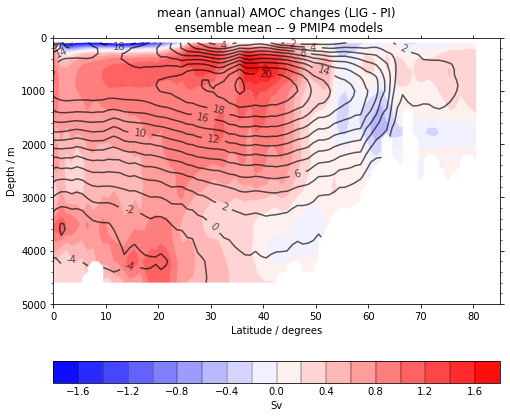

In [106]:
fig=plt.figure(figsize=(8,7))
ax=fig.add_subplot(111)

qplt.contourf(lig_pi_indiv_diff_ave_1, np.arange(-1.8,2.0,0.2), cmap='bwr')
figure=qplt.contour(pi_lig_amoc_model_ave_1, np.arange(-6,32,2), colors='k',alpha=0.65,linestyles='solid') 

ax.clabel(figure, inline=1, fontsize=10, fmt='%1.0f')


ax.yaxis.set_minor_locator(MultipleLocator(200))
ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

ax.set_ylim(5000,0)
ax.set_xlim(0,85)
ax.set(title='mean (annual) AMOC changes (LIG - PI)\n ensemble mean -- 9 PMIP4 models') 

## NOW, add in the MH AMOC data, for MH_AMOC mean (annual)--model averages (8 pmip4 models)

## only use the models which also has lig runs, so no ACCESS-ESM1-5

   MH AMOC data's name is in the format of 'p4_cube_xxxx'

In [74]:
# load mh_fgoals-g3
filename_36='../../../Desktop/esgf_data_folder/streamfunction/mh_fgoalsg3_combined.nc'
p4_fgoalsg3_1=xr.open_dataset(filename_36,decode_times=False)

In [75]:
p4_fgoalsg3_2=p4_fgoalsg3_1.sel(basin=0)
print(p4_fgoalsg3_2)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 316, lev: 31, time: 6000)
Coordinates:
    sector     |S21 ...
  * lev        (lev) float64 0.0 10.0 20.0 30.0 ... 4.19e+03 4.887e+03 5.6e+03
  * lat        (lat) float64 -75.99 -75.75 -75.5 -75.24 ... 89.37 89.62 89.87
  * time       (time) float64 2.285e+05 2.285e+05 ... 4.109e+05 4.11e+05
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lev_bnds   (time, lev, bnds) float64 ...
    lat_bnds   (time, lat, bnds) float64 ...
    msftmz     (time, lev, lat) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            PMIP
    branch_method:          no parent
    branch_time_in_child:   228490.0
    branch_time_in_parent:  0.0
    contact:                Lijuan Li(ljli@mail.iap.ac.cn)
    creation_date:          2019-10-24T14:21:04Z
    data_specs_version:     01.00.30
    experiment:             mid-Holocene
    experiment_id:          midHolocene
    forcing

In [76]:
p4_fgoalsg3=p4_fgoalsg3_2.mean(dim='time')

In [77]:
p4_fgoalsg3_amoc_data=p4_fgoalsg3.msftmz.values
p4_fgoalsg3_lev_data=p4_fgoalsg3.lev.values
p4_fgoalsg3_lat_data=p4_fgoalsg3.lat.values

In [78]:
depth = DimCoord(p4_fgoalsg3_lev_data, standard_name='depth', units='m')
latitude = DimCoord(p4_fgoalsg3_lat_data, standard_name='latitude', units='degrees')

p4_cube_fgoalsg3_amoc = Cube(p4_fgoalsg3_amoc_data,dim_coords_and_dims=[(depth, 0), (latitude, 1)])

In [79]:
p4_cube_fgoalsg3_amoc.data *=1e-9
p4_cube_fgoalsg3_amoc.units = 'Sv'
print(p4_cube_fgoalsg3_amoc)

unknown / (Sv)                      (depth: 31; latitude: 316)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


In [3]:
## MH AMOC data's name in the format of 'p4_cube_xxxx'

p4_cube_ec_amoc = iris.load_cube('EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc','amoc_mean_ann') #'depth''grid_latitude'

p4_cube_fgoalsf3_amoc = iris.load_cube('FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc', 'amoc_mean_ann') 

p4_cube_giss_amoc = iris.load_cube('GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc', 'amoc_mean_ann')

p4_cube_hadgem_amoc = iris.load_cube('HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc', 'amoc_mean_ann') #'grid_latitude'

p4_cube_ipsl_amoc = iris.load_cube('IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc', 'amoc_mean_ann') #'Vertical W levels'

p4_cube_noresm2_amoc = iris.load_cube('NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc', 'amoc_mean_ann')

In [2]:
#extract amoc_mean_ann data from CESM mannually, and then create a new cube

Filename_3='CESM2_midHolocene.cvdp_data.1-700.nc'
p4_cesm=xr.open_dataset(Filename_3,decode_times=False)

In [82]:
p4_cesm_amoc_data=p4_cesm.amoc_mean_ann.values
p4_cesm_lev_data=p4_cesm.lev.values
p4_cesm_lat_data=p4_cesm.lat_amoc.values

In [84]:
p4_depth = DimCoord(p4_cesm_lev_data, standard_name='depth', units='m')
p4_latitude = DimCoord(p4_cesm_lat_data, standard_name='latitude', units='degrees')

p4_cube_cesm_amoc = Cube(p4_cesm_amoc_data,dim_coords_and_dims=[(p4_depth, 0), (p4_latitude, 1)])

In [95]:
print(p4_cube_cesm_amoc)

unknown / (unknown)                 (depth: 61; latitude: 395)
     Dimension coordinates:
          depth                           x             -
          latitude                        -             x


In [85]:
p4_amoc_cube=[p4_cube_cesm_amoc, p4_cube_ec_amoc, p4_cube_fgoalsf3_amoc, p4_cube_fgoalsg3_amoc,
              p4_cube_giss_amoc, p4_cube_hadgem_amoc, p4_cube_ipsl_amoc, p4_cube_noresm2_amoc]

In [86]:
pmip4_modelname=['cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','ipsl','noresm2']

In [87]:
for n in (0,2,3,4,7): #except for ec & hadgem & ipsl:
    globals()['p4_'+pmip4_modelname[n]+'_amoc_regrid'] = p4_amoc_cube[n].interpolate(sample_points_1, iris.analysis.Linear())


In [88]:
for n in (1,5): #for ec, hadgem
    globals()['p4_'+pmip4_modelname[n]+'_amoc_regrid'] = p4_amoc_cube[n].interpolate(sample_points_2, iris.analysis.Linear())


In [89]:
for n in range (6,7): #for ipsl 
    globals()['p4_'+pmip4_modelname[n]+'_amoc_regrid'] = p4_amoc_cube[n].interpolate(sample_points_3, iris.analysis.Linear())


In [97]:
# as cubes have different coord names, so do the calculation with data only first
pmip4_amoc_model_total= p4_cesm_amoc_regrid[:,89:181].data + p4_ec_amoc_regrid[:,89:181].data + p4_fgoalsf3_amoc_regrid[:,89:181].data + p4_fgoalsg3_amoc_regrid[:,89:181].data + p4_giss_amoc_regrid[:,89:181].data + p4_hadgem_amoc_regrid[:,89:181].data + p4_ipsl_amoc_regrid[:,89:181].data + p4_noresm2_amoc_regrid[:,89:181].data 

In [98]:
pmip4_amoc_model_ave=pmip4_amoc_model_total / 8

In [99]:
# then, copy a sample cube to use its coords, but repalce its data with the newly-calculated ones  
pmip4_amoc_model_ave_1 = p4_giss_amoc_regrid[:,89:181].copy(data=pmip4_amoc_model_ave)

In [107]:
# compute the AMOC change (lig-mh) in individual models
for j in range (0,8): 
    globals()['lig_mh_diff_'+ pmip4_modelname[j]] = globals()[pmip4_modelname[j]+'_amoc_regrid'][:,89:181].data - globals()['p4_'+ pmip4_modelname[j]+'_amoc_regrid'][:,89:181].data

In [108]:
# take the averages of the regridded AMOC changes produced by individual models
lig_mh_indiv_diff_total = lig_mh_diff_cesm + lig_mh_diff_ec + lig_mh_diff_fgoalsf3 + lig_mh_diff_fgoalsg3 + lig_mh_diff_giss + lig_mh_diff_hadgem +  lig_mh_diff_ipsl + lig_mh_diff_noresm2
lig_mh_indiv_diff_ave = lig_mh_indiv_diff_total / 8

In [111]:
# put back the data into one of the regridded models in order to use its dimension coordinates for further plotting
lig_mh_indiv_diff_ave_1 = pi_giss_amoc_regrid[:,89:181].copy(data=lig_mh_indiv_diff_ave)

# Ensemble mean AMOC changes between MH models and LIG (LIG-MH), use MH as a baseline (same as using PI as a baseline)

## Models have AMOC data in both LIG and MH (8 pmip4 models)

[Text(0.5, 1.0, 'mean (annual) AMOC changes (LIG - MH) \n ensemble mean -- 8 PMIP4 models')]

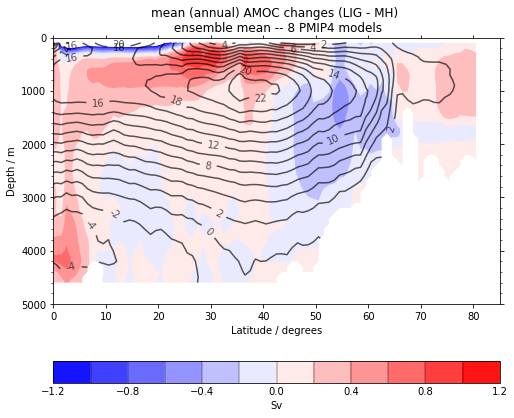

In [112]:
fig=plt.figure(figsize=(8,7))
ax=fig.add_subplot(111)

qplt.contourf(lig_mh_indiv_diff_ave_1, np.arange(-1.2,1.4,0.2), cmap='bwr')
figure=qplt.contour(pmip4_amoc_model_ave_1, np.arange(-6,32,2), colors='k',alpha=0.65,linestyles='solid') 

ax.clabel(figure, inline=1, fontsize=10, fmt='%1.0f')


ax.yaxis.set_minor_locator(MultipleLocator(200))
ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

ax.set_ylim(5000,0)
ax.set_xlim(0,85)
ax.set(title='mean (annual) AMOC changes (LIG - MH) \n ensemble mean -- 8 PMIP4 models')

## black contours show ensemble mean AMOC spatial structure in the MH (PMIP4)

# changes in maximum AMOC strength: about 0.2-0.4 Sv